In [19]:
#!pip install pytesseract
#!pip install --upgrade scikit-learn==0.22

  Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [14]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [10]:
img = cv2.imread(r'C:\Users\rames\OneDrive\Documents\GitHub\Skill-Recommender-System\SampleResumes\01FB15ECS008-page-001.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [11]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 200:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

-1

In [13]:
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

In [15]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Euclidean:	 [3 3 3 1 0 0 1 1 0 3 3 3 1 0 3 3 1 3 1 1 1 3 0 3 1 1 1 1 1 1 0 1 3 2 0 2 0
 3 0 2 2 1 0 0 2 1 0 1 1 2 2 1 1 0 3 2 1 3 2 2 1 3 3 0 1 0 1 1 1 1 3 0 3 2
 2 1 3 1 0 1 1 2 0 1 1 2 3 3 0 3 1 1 1 3 1 1 2 1 2 0 2 0 1 0 1 0 2 0 2 1 1
 1 0 1 1 0 1 0 0 1 3 2 0 2 3 2 0 3 2 1 1 1 1 0 0 1 2 1 1 1 3 1 2 1 2 1 0 2
 1 0 1 3 0 1 2 2 0 0 1 3 0 1 1 2 1 3 1 1 3 2 0 0 0 0 2 0 2 2 2 1 2 0 0 2 2
 2 2 1 0 3 1 1 1 0 3 0 2 2 2 0 0 3 2 0 0 1 1 0 1 1 2 0 0 0 2 2 1 1 3 0 2 1
 2 1 1 2 2 1 1 0 1 0 1 0 1 1 1 1 3 2 0 0 2 1 2 0 0 1 2 2 0 0 1 0 2 3 1 0 1]
Manhattan:	 [3 1 0 0 2 2 0 0 2 0 0 0 0 2 0 0 0 0 0 1 0 0 2 0 0 1 1 1 1 0 2 0 0 1 2 1 2
 0 2 2 1 1 2 2 1 1 2 1 1 1 1 1 0 2 0 1 1 0 1 1 0 0 0 2 1 2 1 1 1 1 0 2 0 1
 3 1 0 0 2 1 1 1 2 0 0 1 0 0 2 1 0 1 1 0 0 1 1 0 1 2 1 2 0 2 0 2 1 2 1 1 1
 1 2 1 1 2 0 2 2 1 0 1 2 3 0 1 2 0 1 1 1 0 1 2 2 1 2 1 1 1 0 1 1 0 1 1 2 1
 1 2 1 0 2 1 1 1 2 2 1 0 2 1 1 1 1 0 0 1 0 1 2 2 2 2 2 2 1 1 1 0 1 2 2 1 1
 1 1 1 2 0 1 1 1 2 0 2 3 1 1 2 2 0 1 2 2 1 1 2 0 1 1 2 2 2 1 1 1 0 0 2 1 1


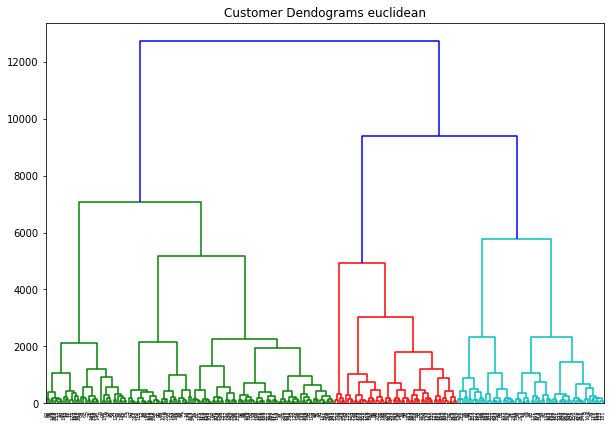

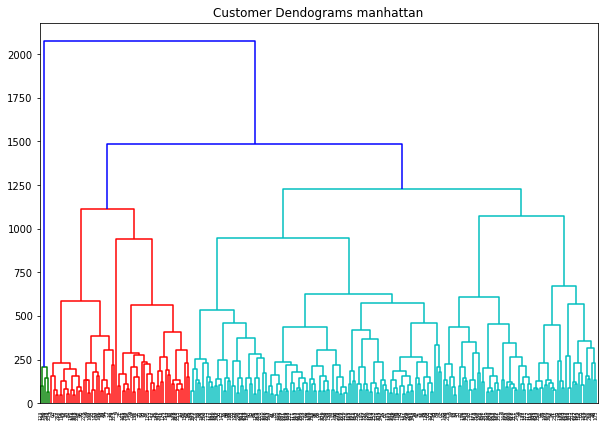

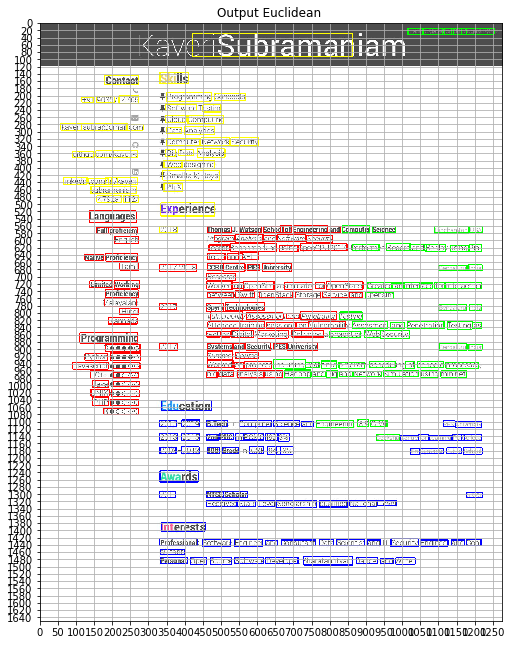

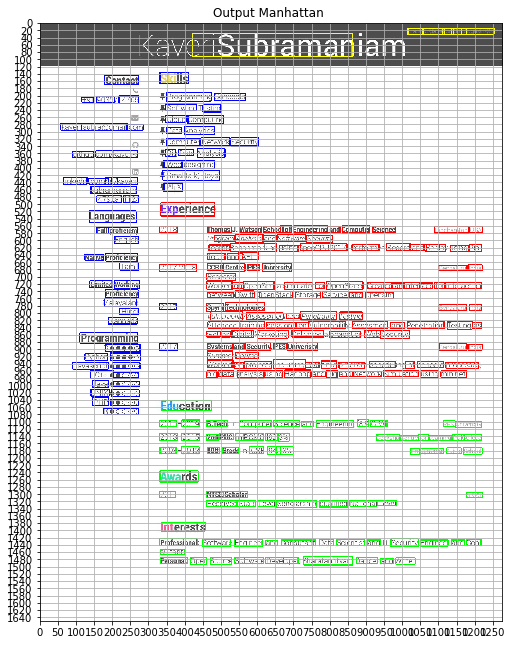

In [71]:
iris = load_iris()
X = np.array([[  420,  28,  860,  25,  861,  92,  421,  96,  0.38128983974456787 ],
[  332,  496,  482,  497,  481,  532,  332,  531,  0.3668982684612274 ],
[  338,  406,  494,  409,  494,  433,  337,  431,  0.3248319625854492 ],
[  109,  854,  269,  853,  269,  883,  110,  884,  0.3112836182117462 ],
[  333,  1040,  472,  1041,  472,  1069,  333,  1068,  0.331868439912796 ],
[  333,  1377,  454,  1376,  454,  1402,  333,  1403,  0.3124736547470093 ],
[  136,  518,  264,  520,  264,  551,  136,  549,  0.30908697843551636 ],
[  176,  760,  267,  762,  266,  782,  176,  780,  0.3462007939815521 ],
[  330,  1235,  435,  1236,  435,  1266,  330,  1265,  0.2830721437931061 ],
[  330,  136,  409,  137,  408,  167,  330,  166,  0.2874981760978699 ],
[  140,  450,  265,  451,  265,  470,  140,  468,  0.34106898307800293 ],
[  177,  145,  272,  145,  272,  169,  178,  170,  0.3321434259414673 ],
[  175,  1062,  271,  1061,  271,  1079,  176,  1080,  0.3230014741420746 ],
[  332,  1452,  397,  1451,  397,  1467,  332,  1467,  0.3844504952430725 ],
[  153,  352,  267,  351,  268,  370,  153,  371,  0.33750003576278687 ],
[  115,  277,  238,  276,  239,  297,  115,  298,  0.28092437982559204 ],
[  180,  736,  270,  738,  270,  757,  180,  754,  0.3807026445865631 ],
[  407,  254,  506,  255,  506,  277,  407,  275,  0.35125765204429626 ],
[  188,  813,  267,  812,  267,  830,  188,  831,  0.33771035075187683 ],
[  459,  690,  538,  691,  538,  709,  459,  708,  0.3319414258003235 ],
[  181,  635,  269,  637,  269,  657,  181,  655,  0.2999695837497711 ],
[  390,  379,  481,  382,  481,  400,  390,  398,  0.2793593406677246 ],
[  726,  1472,  861,  1471,  861,  1495,  726,  1496,  0.3104304075241089 ],
[  398,  284,  479,  286,  479,  307,  398,  306,  0.3318183422088623 ],
[  196,  1012,  273,  1013,  273,  1030,  195,  1029,  0.3200094401836395 ],
[  716,  609,  845,  606,  845,  627,  717,  629,  0.3919180631637573 ],
[  612,  663,  691,  665,  691,  685,  611,  683,  0.2929135859012604 ],
[  468,  796,  559,  799,  558,  820,  467,  817,  0.3161006271839142 ],
[  682,  881,  764,  883,  764,  903,  681,  902,  0.2697063088417053 ],
[  219,  786,  271,  786,  271,  805,  219,  805,  0.25190165638923645 ],
[  535,  1425,  613,  1424,  613,  1443,  536,  1444,  0.3078761398792267 ],
[  90,  935,  187,  936,  187,  955,  90,  954,  0.33685827255249023 ],
[  347,  191,  471,  192,  471,  215,  347,  213,  0.34887275099754333 ],
[  1103,  959,  1175,  958,  1175,  977,  1103,  978,  0.30281251668930054 ],
[  331,  1474,  406,  1475,  406,  1492,  330,  1491,  0.3219339847564697 ],
[  1117,  715,  1215,  716,  1215,  733,  1117,  732,  0.34994831681251526 ],
[  328,  1423,  432,  1424,  432,  1442,  327,  1441,  0.35736697912216187 ],
[  433,  347,  510,  349,  509,  370,  432,  369,  0.412781685590744 ],
[  768,  1317,  845,  1315,  846,  1335,  769,  1337,  0.2806776762008667 ],
[  761,  1096,  864,  1094,  864,  1115,  761,  1117,  0.432352215051651 ],
[  796,  851,  881,  849,  881,  867,  797,  869,  0.31929683685302734 ],
[  462,  824,  547,  822,  548,  841,  462,  842,  0.308847576379776 ],
[  536,  1474,  614,  1475,  614,  1492,  536,  1491,  0.3588421642780304 ],
[  457,  1318,  541,  1316,  542,  1333,  458,  1335,  0.32604363560676575 ],
[  1117,  935,  1207,  934,  1208,  952,  1117,  953,  0.32943442463874817 ],
[  788,  714,  888,  713,  889,  734,  789,  735,  0.2837534546852112 ],
[  853,  1317,  928,  1315,  928,  1333,  853,  1335,  0.2978305518627167 ],
[  603,  741,  695,  739,  696,  758,  603,  760,  0.3309129774570465 ],
[  523,  607,  651,  609,  651,  631,  523,  629,  0.3397226929664612 ],
[  642,  928,  732,  930,  731,  952,  642,  951,  0.36739876866340637 ],
[  1098,  777,  1174,  776,  1175,  793,  1098,  794,  0.3134423792362213 ],
[  462,  742,  533,  741,  533,  758,  462,  758,  0.35542428493499756 ],
[  202,  989,  272,  987,  273,  1003,  202,  1005,  0.35314732789993286 ],
[  1144,  1098,  1216,  1099,  1215,  1116,  1143,  1115,  0.33375900983810425 ],
[  479,  193,  566,  194,  566,  213,  478,  213,  0.31892669200897217 ],
[  1039,  933,  1111,  932,  1111,  951,  1039,  952,  0.29241088032722473 ],
[  599,  847,  683,  849,  683,  869,  598,  868,  0.4308066666126251 ],
[  347,  317,  440,  318,  440,  338,  346,  336,  0.35346710681915283 ],
[  1096,  668,  1173,  667,  1173,  683,  1096,  684,  0.36404669284820557 ],
[  825,  797,  888,  800,  887,  819,  824,  816,  0.33888936042785645 ],
[  199,  937,  275,  936,  275,  954,  199,  955,  0.2781151831150055 ],
[  341,  441,  393,  442,  393,  464,  340,  464,  0.2555110454559326 ],
[  89,  354,  147,  352,  148,  371,  89,  372,  0.2989116907119751 ],
[  651,  1316,  760,  1317,  760,  1337,  651,  1336,  0.3242451250553131 ],
[  718,  796,  815,  797,  815,  819,  718,  817,  0.29533910751342773 ],
[  979,  1475,  1033,  1476,  1033,  1493,  978,  1492,  0.3009589910507202 ],
[  528,  847,  588,  846,  588,  868,  528,  869,  0.3529590666294098 ],
[  698,  558,  791,  559,  791,  579,  698,  578,  0.35921576619148254 ],
[  511,  770,  619,  773,  618,  794,  511,  791,  0.2821447253227234 ],
[  504,  664,  564,  665,  564,  684,  504,  683,  0.2933693528175354 ],
[  345,  223,  431,  223,  431,  242,  345,  243,  0.31024059653282166 ],
[  1160,  1136,  1215,  1135,  1215,  1151,  1160,  1152,  0.30625033378601074 ],
[  525,  316,  602,  319,  602,  339,  524,  337,  0.2735635042190552 ],
[  1085,  562,  1180,  561,  1180,  579,  1085,  580,  0.3226526081562042 ],
[  1161,  15,  1250,  13,  1250,  30,  1161,  32,  0.33201831579208374 ],
[  561,  713,  644,  714,  644,  735,  561,  734,  0.2863514721393585 ],
[  196,  425,  269,  427,  268,  446,  195,  444,  0.27429234981536865 ],
[  193,  910,  276,  908,  276,  930,  193,  931,  0.20966538786888123 ],
[  389,  1169,  437,  1168,  438,  1188,  389,  1189,  0.2541658878326416 ],
[  328,  665,  429,  664,  430,  684,  328,  685,  0.3130044937133789 ],
[  460,  907,  530,  908,  530,  927,  459,  926,  0.33304786682128906 ],
[  896,  742,  974,  741,  974,  759,  897,  760,  0.2763865292072296 ],
[  1072,  1138,  1131,  1137,  1132,  1151,  1073,  1153,  0.35805749893188477 ],
[  204,  588,  271,  587,  272,  608,  205,  608,  0.33810725808143616 ],
[  194,  1038,  272,  1037,  272,  1054,  195,  1055,  0.32981106638908386 ],
[  906,  933,  978,  931,  978,  950,  906,  951,  0.3396078944206238 ],
[  63,  425,  129,  426,  129,  444,  63,  443,  0.35011032223701477 ],
[  156,  476,  225,  477,  225,  494,  156,  493,  0.2933379113674164 ],
[  1045,  1174,  1110,  1173,  1110,  1188,  1046,  1189,  0.33483612537384033 ],
[  329,  560,  376,  559,  377,  578,  329,  578,  0.29283303022384644 ],
[  123,  912,  185,  911,  186,  930,  123,  931,  0.3248865306377411 ],
[  623,  826,  706,  824,  707,  841,  623,  843,  0.2716948986053467 ],
[  703,  741,  772,  740,  772,  759,  703,  760,  0.2694966793060303 ],
[  345,  255,  402,  256,  402,  273,  345,  273,  0.35453078150749207 ],
[  205,  710,  275,  713,  274,  733,  204,  730,  0.2847420573234558 ],
[  465,  612,  522,  610,  522,  628,  465,  629,  0.284488707780838 ],
[  823,  936,  892,  935,  893,  952,  823,  953,  0.333368182182312 ],
[  137,  711,  200,  710,  200,  730,  138,  730,  0.2707647979259491 ],
[  1099,  885,  1175,  886,  1175,  902,  1099,  901,  0.3419390022754669 ],
[  446,  1424,  524,  1424,  524,  1443,  446,  1442,  0.34504953026771545 ],
[  1011,  823,  1113,  824,  1112,  842,  1011,  841,  0.3091212809085846 ],
[  599,  1317,  648,  1316,  648,  1333,  600,  1334,  0.2970390021800995 ],
[  189,  564,  269,  561,  269,  580,  189,  582,  0.2999023497104645 ],
[  930,  1316,  981,  1316,  981,  1332,  930,  1333,  0.2241279035806656 ],
[  140,  1010,  190,  1009,  190,  1029,  140,  1030,  0.2945726215839386 ],
[  621,  1474,  710,  1473,  710,  1492,  621,  1493,  0.3253296911716461 ],
[  938,  847,  1016,  849,  1016,  870,  938,  869,  0.2409958839416504 ],
[  1165,  1172,  1217,  1171,  1217,  1189,  1166,  1190,  0.2874647080898285 ],
[  859,  823,  957,  823,  956,  843,  859,  842,  0.29414114356040955 ],
[  567,  799,  669,  799,  669,  817,  567,  817,  0.23266202211380005 ],
[  653,  584,  732,  583,  732,  602,  654,  603,  0.2511383295059204 ],
[  563,  933,  638,  932,  638,  952,  564,  954,  0.25978052616119385 ],
[  1047,  1426,  1123,  1425,  1123,  1443,  1047,  1444,  0.3236229121685028 ],
[  544,  958,  615,  959,  615,  979,  543,  979,  0.2783746123313904 ],
[  658,  613,  710,  612,  710,  630,  659,  631,  0.25703054666519165 ],
[  329,  1096,  376,  1096,  376,  1114,  329,  1114,  0.2705499529838562 ],
[  201,  964,  271,  963,  271,  979,  201,  979,  0.37199243903160095 ],
[  330,  1170,  374,  1170,  374,  1188,  330,  1188,  0.2498953640460968 ],
[  459,  1096,  516,  1096,  516,  1113,  459,  1114,  0.2904932498931885 ],
[  462,  635,  509,  634,  509,  652,  463,  653,  0.2769680619239807 ],
[  442,  316,  521,  317,  521,  337,  442,  336,  0.28937414288520813 ],
[  915,  561,  978,  560,  978,  578,  915,  578,  0.24468252062797546 ],
[  870,  1474,  929,  1475,  929,  1492,  870,  1492,  0.32208943367004395 ],
[  1052,  14,  1114,  12,  1114,  30,  1052,  32,  0.3281480669975281 ],
[  217,  201,  272,  202,  272,  221,  217,  220,  0.2734934687614441 ],
[  833,  559,  908,  560,  908,  579,  832,  578,  0.3526065945625305 ],
[  548,  1096,  637,  1095,  637,  1114,  548,  1114,  0.32472655177116394 ],
[  448,  225,  499,  226,  498,  245,  447,  244,  0.3384375274181366 ],
[  902,  715,  971,  714,  971,  733,  902,  734,  0.3524302840232849 ],
[  459,  713,  531,  715,  530,  734,  459,  733,  0.2704521417617798 ],
[  673,  715,  751,  716,  751,  734,  673,  733,  0.3272305130958557 ],
[  143,  1034,  189,  1033,  189,  1054,  144,  1055,  0.2995055317878723 ],
[  481,  586,  535,  586,  535,  603,  481,  604,  0.3494408130645752 ],
[  390,  1095,  439,  1095,  439,  1114,  390,  1114,  0.25791066884994507 ],
[  664,  1426,  758,  1425,  758,  1442,  664,  1443,  0.36689117550849915 ],
[  732,  585,  806,  586,  806,  604,  732,  602,  0.22604215145111084 ],
[  927,  1135,  989,  1135,  989,  1151,  927,  1152,  0.24646997451782227 ],
[  537,  584,  616,  585,  615,  605,  537,  604,  0.27916666865348816 ],
[  549,  823,  617,  824,  617,  843,  549,  843,  0.2680075764656067 ],
[  460,  931,  531,  931,  531,  950,  460,  951,  0.2858882248401642 ],
[  382,  348,  423,  349,  423,  366,  382,  366,  0.2904808819293976 ],
[  739,  822,  842,  823,  842,  842,  739,  841,  0.323930561542511 ],
[  1129,  613,  1178,  612,  1179,  630,  1129,  631,  0.2649379074573517 ],
[  219,  661,  271,  662,  271,  681,  218,  680,  0.22456996142864227 ],
[  674,  957,  745,  958,  744,  978,  674,  977,  0.3028404414653778 ],
[  615,  560,  670,  559,  670,  577,  615,  577,  0.31455928087234497 ],
[  329,  1132,  377,  1132,  377,  1151,  329,  1151,  0.251368910074234 ],
[  1122,  823,  1190,  822,  1190,  844,  1122,  845,  0.34189537167549133 ],
[  460,  664,  506,  664,  506,  682,  460,  682,  0.29748281836509705 ],
[  415,  1474,  459,  1474,  459,  1494,  414,  1493,  0.24993617832660675 ],
[  460,  885,  531,  884,  531,  902,  461,  903,  0.33103880286216736 ],
[  347,  287,  390,  288,  390,  305,  347,  304,  0.2995796799659729 ],
[  1173,  1294,  1217,  1292,  1217,  1309,  1173,  1310,  0.28812524676322937 ],
[  693,  848,  779,  846,  780,  866,  693,  868,  0.32229477167129517 ],
[  953,  609,  1020,  609,  1020,  627,  953,  627,  0.26072168350219727 ],
[  1059,  610,  1117,  609,  1117,  629,  1059,  630,  0.28687989711761475 ],
[  642,  1096,  713,  1096,  713,  1114,  642,  1114,  0.2595916986465454 ],
[  817,  1424,  893,  1423,  894,  1442,  817,  1443,  0.32740509510040283 ],
[  492,  958,  533,  958,  533,  976,  492,  977,  0.2674710154533386 ],
[  57,  276,  113,  276,  113,  295,  57,  296,  0.2553284466266632 ],
[  328,  1291,  372,  1290,  373,  1310,  328,  1310,  0.263784259557724 ],
[  548,  561,  610,  561,  610,  577,  548,  577,  0.2029884159564972 ],
[  537,  909,  601,  907,  601,  926,  538,  928,  0.2734496593475342 ],
[  945,  959,  1042,  956,  1043,  975,  945,  977,  0.29146069288253784 ],
[  566,  881,  636,  883,  635,  902,  566,  901,  0.3036584258079529 ],
[  341,  379,  393,  380,  392,  399,  341,  398,  0.24377277493476868 ],
[  123,  637,  175,  638,  175,  654,  122,  654,  0.31273359060287476 ],
[  458,  774,  507,  776,  506,  796,  458,  794,  0.23625504970550537 ],
[  229,  476,  271,  475,  271,  494,  229,  495,  0.20107287168502808 ],
[  746,  960,  786,  959,  786,  976,  746,  977,  0.23907725512981415 ],
[  1120,  1172,  1159,  1172,  1159,  1188,  1120,  1189,  0.2802247703075409 ],
[  458,  1291,  505,  1291,  505,  1309,  458,  1308,  0.27382713556289673 ],
[  576,  1169,  615,  1168,  615,  1188,  576,  1189,  0.23331376910209656 ],
[  506,  1292,  571,  1291,  572,  1308,  506,  1309,  0.288327693939209 ],
[  909,  1096,  955,  1095,  955,  1114,  909,  1114,  0.22433409094810486 ],
[  501,  1170,  547,  1169,  547,  1187,  501,  1188,  0.2726886570453644 ],
[  731,  935,  768,  933,  769,  950,  732,  952,  0.23619291186332703 ],
[  1182,  562,  1217,  562,  1218,  577,  1182,  578,  0.21741828322410583 ],
[  775,  932,  817,  933,  817,  952,  775,  951,  0.2828419804573059 ],
[  329,  774,  376,  774,  376,  791,  330,  792,  0.28164613246917725 ],
[  1182,  610,  1215,  611,  1215,  629,  1182,  628,  0.2537672519683838 ],
[  390,  1132,  439,  1131,  439,  1151,  390,  1151,  0.25618988275527954 ],
[  1173,  1424,  1214,  1424,  1214,  1442,  1173,  1442,  0.2732171416282654 ],
[  860,  610,  932,  609,  933,  627,  860,  628,  0.26242902874946594 ],
[  1046,  717,  1081,  716,  1081,  732,  1047,  733,  0.3110440969467163 ],
[  1178,  886,  1217,  887,  1217,  902,  1178,  901,  0.2996705174446106 ],
[  1181,  777,  1216,  777,  1216,  792,  1181,  792,  0.25685393810272217 ],
[  853,  742,  888,  740,  888,  758,  853,  759,  0.23567377030849457 ],
[  966,  1423,  1042,  1424,  1041,  1445,  965,  1444,  0.26582691073417664 ],
[  115,  204,  147,  203,  148,  218,  116,  219,  0.2097451090812683 ],
[  778,  740,  848,  740,  848,  758,  778,  758,  0.31135207414627075 ],
[  547,  632,  600,  632,  600,  652,  547,  653,  0.13155457377433777 ],
[  538,  739,  589,  740,  589,  758,  538,  757,  0.2769052982330322 ],
[  993,  1137,  1041,  1136,  1041,  1151,  993,  1151,  0.26532071828842163 ],
[  241,  279,  284,  280,  284,  295,  240,  295,  0.255302369594574 ],
[  901,  1426,  936,  1426,  937,  1441,  901,  1442,  0.27878060936927795 ],
[  1013,  14,  1056,  14,  1056,  31,  1014,  31,  0.23985496163368225 ],
[  893,  848,  938,  848,  938,  867,  893,  867,  0.1961146891117096 ],
[  864,  960,  939,  958,  939,  976,  864,  978,  0.30456042289733887 ],
[  651,  1169,  697,  1169,  697,  1189,  651,  1189,  0.24412141740322113 ],
[  460,  1170,  495,  1170,  495,  1187,  460,  1187,  0.2786826491355896 ],
[  154,  203,  204,  204,  204,  220,  154,  219,  0.2922755777835846 ],
[  824,  960,  860,  959,  860,  975,  825,  977,  0.24452483654022217 ],
[  1132,  1426,  1168,  1426,  1168,  1441,  1132,  1442,  0.2775999903678894 ],
[  938,  1476,  972,  1476,  972,  1491,  938,  1492,  0.2750052213668823 ],
[  612,  586,  652,  586,  652,  603,  612,  602,  0.15911908447742462 ],
[  461,  560,  526,  559,  526,  578,  461,  578,  0.2030918002128601 ],
[  1110,  1097,  1142,  1097,  1143,  1114,  1110,  1114,  0.11737138777971268 ],
[  144,  987,  188,  987,  188,  1004,  144,  1004,  0.29081445932388306 ],
[  678,  800,  715,  800,  715,  816,  678,  816,  0.2514839172363281 ],
[  1017,  611,  1065,  610,  1065,  627,  1018,  628,  0.16521616280078888 ],
[  458,  1134,  493,  1133,  493,  1150,  459,  1151,  0.2359027862548828 ],
[  768,  1425,  807,  1426,  807,  1442,  768,  1441,  0.2799881100654602 ],
[  468,  1475,  528,  1475,  528,  1493,  467,  1492,  0.32491979002952576 ],
[  1002,  716,  1044,  716,  1044,  732,  1002,  733,  0.25627654790878296 ],
[  1178,  667,  1217,  667,  1217,  683,  1178,  683,  0.23172907531261444 ],
[  515,  636,  556,  635,  557,  652,  515,  653,  0.2191179394721985 ],
[  179,  887,  274,  886,  275,  907,  179,  909,  0.10540921986103058 ],
[  134,  428,  188,  428,  188,  444,  134,  445,  0.2618483603000641 ],
[  544,  1317,  593,  1316,  593,  1334,  545,  1335,  0.27691027522087097 ],
[  1048,  959,  1099,  959,  1098,  978,  1047,  978,  0.2417738288640976 ],
[  459,  959,  488,  960,  487,  978,  458,  977,  0.18177537620067596 ],
[  789,  958,  819,  958,  819,  978,  789,  977,  0.20811326801776886 ],
[  329,  883,  378,  883,  378,  902,  329,  902,  0.2868523597717285 ],
[  138,  959,  202,  959,  202,  980,  138,  980,  0.22898229956626892 ],
[  965,  826,  1003,  825,  1004,  842,  966,  842,  0.22635388374328613 ],
[  968,  717,  1000,  716,  1001,  733,  969,  733,  0.18539774417877197 ],
[  534,  935,  562,  935,  561,  952,  533,  951,  0.21146446466445923 ],
[  155,  563,  188,  564,  188,  581,  154,  580,  0.1848406046628952 ],
[  621,  1132,  653,  1131,  654,  1151,  621,  1152,  0.20064324140548706 ],
[  530,  884,  564,  884,  564,  901,  530,  902,  0.22194130718708038 ],
[  560,  1132,  616,  1131,  616,  1150,  561,  1151,  0.2640993595123291 ],
[  617,  959,  668,  959,  668,  977,  617,  977,  0.26530858874320984 ],
[  621,  1427,  654,  1426,  654,  1441,  621,  1442,  0.2765619158744812 ],
[  528,  716,  559,  716,  559,  733,  529,  734,  0.14682088792324066 ],
[  642,  883,  678,  882,  679,  901,  643,  901,  0.24260495603084564 ],
[  459,  851,  495,  850,  496,  866,  459,  867,  0.26584088802337646 ],
[  499,  851,  522,  850,  523,  866,  499,  867,  0.14337503910064697 ],
[  345,  348,  374,  349,  373,  367,  344,  366,  0.22729122638702393 ],
[  875,  1094,  904,  1094,  905,  1113,  875,  1114,  0.2280764877796173 ],
[  626,  1168,  662,  1169,  662,  1189,  625,  1188,  0.1655104011297226 ],
[  720,  1098,  753,  1097,  753,  1113,  720,  1114,  0.20867741107940674 ],
[  1191,  826,  1215,  825,  1216,  843,  1192,  844,  0.19987526535987854 ],
[  572,  665,  604,  664,  605,  682,  573,  683,  0.22224238514900208 ],
[  1006,  934,  1032,  934,  1032,  952,  1006,  952,  0.1037343442440033 ],
[  1020,  1173,  1047,  1173,  1047,  1189,  1019,  1188,  0.18495772778987885 ],
[  492,  1133,  532,  1132,  532,  1149,  492,  1150,  0.2688230574131012 ],
[  792,  562,  828,  562,  828,  578,  792,  578,  0.18411415815353394 ],
[  1109,  15,  1137,  14,  1137,  30,  1109,  30,  0.19972842931747437 ],
[  1086,  716,  1113,  716,  1113,  732,  1086,  732,  0.1882857233285904 ],
[  538,  1133,  559,  1133,  559,  1151,  538,  1151,  0.10806214064359665 ],
[  1135,  1136,  1169,  1135,  1169,  1151,  1136,  1152,  0.13457541167736053 ],
[  757,  715,  784,  715,  784,  733,  757,  733,  0.16222190856933594 ],
[  656,  1132,  685,  1131,  686,  1153,  656,  1154,  0.20834247767925262 ],
[  1133,  14,  1175,  14,  1175,  31,  1133,  31,  0.25434839725494385 ],
[  179,  427,  213,  428,  213,  444,  179,  444,  0.1333804577589035 ],
[  704,  826,  739,  826,  739,  842,  703,  842,  0.14468234777450562 ],
[  1042,  1136,  1070,  1136,  1070,  1151,  1042,  1151,  0.15981008112430573 ],
[  662,  559,  692,  559,  693,  578,  662,  578,  0.15263400971889496 ]])

# setting distance_threshold=0 ensures we compute the full tree.

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms euclidean")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms manhattan")
dend = shc.dendrogram(shc.linkage(X, method='average'))

model1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model1.fit(X)
labels1 = model1.labels_
print("Euclidean:\t",labels1)

model2 = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='average')
model2.fit(X)
labels2 = model2.labels_
print("Manhattan:\t", labels2)

img1 = cv2.imread(r'C:\Users\rames\OneDrive\Documents\GitHub\Skill-Recommender-System\SampleResumes\00-Kaveri-page-001.jpg')

img1_plot = img1.copy()
ctr = 0

# Moving over the results and display on the image
for row in X:
    if(labels1[ctr]==0):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(0, 0, 255), 2)
    if(labels1[ctr]==1):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(255, 0, 0), 2)
    if(labels1[ctr]==2):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(0, 255, 0), 2)
    if(labels1[ctr]==3):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(255, 255, 0), 2)
    ctr+=1
    
fig= plt.figure(figsize=(15,11))
ax = fig.gca()
ax.set_xticks(np.arange(0, 1800, 50))
ax.set_yticks(np.arange(0, 2000, 20))
plt.imshow(img1_plot)
plt.title('Output Euclidean ')
plt.grid()
plt.show()

ctr = 0

for row in X:
    if(labels2[ctr]==0):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(0, 0, 255), 2)
    if(labels2[ctr]==1):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(255, 0, 0), 2)
    if(labels2[ctr]==2):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(0, 255, 0), 2)
    if(labels2[ctr]==3):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(255, 255, 0), 2)
    ctr+=1
    
fig= plt.figure(figsize=(15,11))
ax = fig.gca()
ax.set_xticks(np.arange(0, 1800, 50))
ax.set_yticks(np.arange(0, 2000, 20))
plt.imshow(img1_plot)
plt.title('Output Manhattan ')
plt.grid()
plt.show()


Euclidean:	 [0 2 2 3 1 3 0 0 0 0 1 0 2 0 0 3 1 2 0 3 0 2 2 3 0 2 3 1 1 0 3 0 2 1 0 1 2
 0 0 2 2 0 1 0 1 3 0 0 1 0 3 3 0 0 3 1 0 2 0 1 3 2 1 1 1 3 2 2 1 2 2 0 0 3
 3 2 0 0 3 3 3 3 0 2 1 0 0 0 3 2 2 3 2 2 1 0 0 0 3 0 1 3 2 3 0 3 1 0 3 1 0
 1 3 1 3 0 3 0 3 2 1 1 1 2 0 3 3 3 0 0 3 0 3 1 2 1 3 3 3 1 0 0 3 1 0 2 0 0
 0 0 3 3 0 3 0 3 3 1 0 1 1 0 0 0 2 0 3 2 3 3 3 3 0 2 0 0 1 0 1 1 3 2 2 1 2
 0 1 0 0 0 1 3 0 0 3 2 3 0 1 2 3 2 0 1 0 0 3 2 1 0 2 1 2 2 0 3 2 3 0 2 3 3
 0 3 0 3 0 0 3 3 0 3 0 0 1 3 1 0 3 2 2 0 0 3 0 2 0 1 0 1 3 2 3 0 0 2 2 3 0
 2 0 3 0 0 3]
Manhattan:	 [2 0 0 0 1 2 2 2 2 2 1 2 0 2 2 2 1 0 2 0 2 0 0 2 2 0 2 3 3 2 2 2 0 3 2 1 0
 2 3 0 0 2 0 2 0 0 3 2 1 2 0 2 2 2 2 1 2 0 2 1 0 0 3 0 0 0 0 0 0 0 0 2 2 2
 0 0 2 2 2 2 2 0 2 0 0 2 2 2 0 0 0 2 0 0 0 2 2 3 0 2 0 0 0 0 2 2 0 2 0 1 3
 1 2 0 0 2 2 3 0 0 0 0 3 0 2 0 2 0 2 2 0 3 0 1 0 0 0 0 2 0 3 2 0 3 2 0 2 2
 2 2 0 2 2 0 2 0 2 0 3 1 1 2 2 3 0 2 2 0 0 0 0 0 2 0 2 2 0 3 0 1 0 0 0 0 0
 2 1 2 2 2 3 0 2 2 2 0 0 2 0 0 0 0 2 0 3 2 0 0 0 2 0 3 0 0 3 0

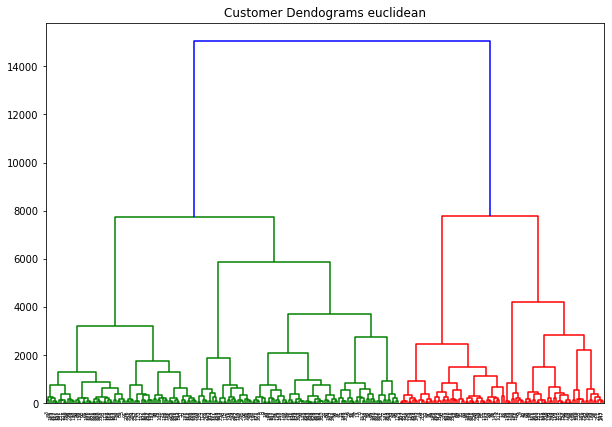

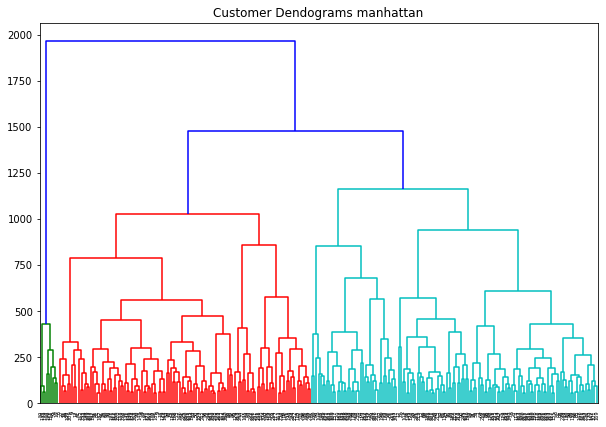

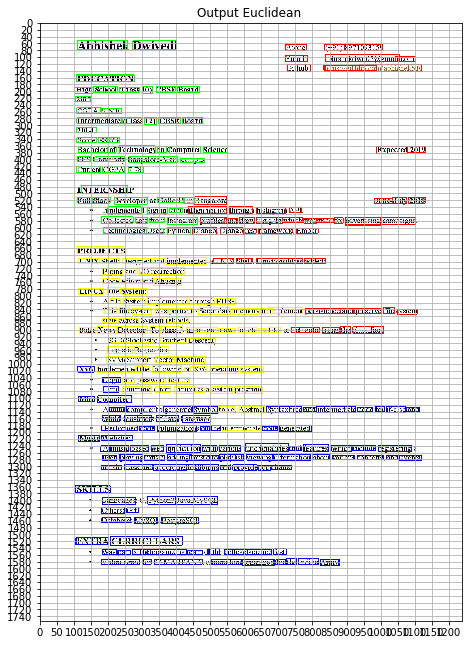

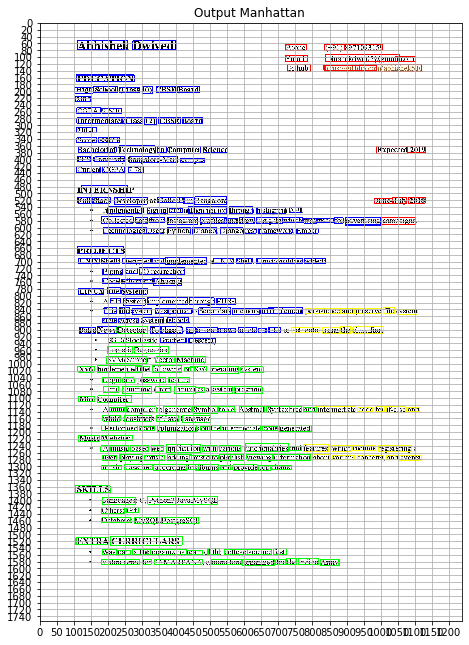

In [97]:
iris = load_iris()
X = np.array([[  205,  1505,  417,  1509,  416,  1531,  204,  1528,  0.35312619805336 ],
[  120,  476,  256,  478,  256,  499,  120,  497,  0.3686137795448303 ],
[  106,  152,  276,  151,  276,  172,  106,  174,  0.2699739634990692 ],
[  108,  655,  245,  656,  245,  677,  108,  676,  0.36977213621139526 ],
[  835,  93,  1054,  90,  1054,  111,  836,  114,  0.32695475220680237 ],
[  209,  921,  332,  919,  332,  938,  209,  940,  0.36922886967658997 ],
[  104,  1357,  205,  1358,  205,  1377,  104,  1376,  0.3272240459918976 ],
[  316,  1545,  428,  1543,  429,  1559,  316,  1561,  0.34040066599845886 ],
[  111,  1208,  174,  1208,  174,  1226,  111,  1225,  0.30386725068092346 ],
[  180,  1208,  270,  1207,  270,  1224,  180,  1225,  0.24907532334327698 ],
[  936,  120,  1118,  122,  1118,  141,  935,  139,  0.3064980208873749 ],
[  181,  1420,  246,  1421,  246,  1438,  181,  1437,  0.32595521211624146 ],
[  261,  391,  402,  389,  403,  409,  262,  412,  0.3242584764957428 ],
[  334,  1573,  475,  1570,  475,  1587,  334,  1591,  0.34047359228134155 ],
[  180,  1572,  291,  1571,  291,  1588,  180,  1589,  0.31283482909202576 ],
[  530,  1179,  647,  1177,  647,  1195,  530,  1196,  0.3364444077014923 ],
[  832,  124,  987,  120,  987,  138,  832,  141,  0.2586553692817688 ],
[  109,  52,  257,  50,  257,  77,  109,  78,  0.35817164182662964 ],
[  180,  1181,  286,  1179,  286,  1196,  180,  1198,  0.32071635127067566 ],
[  291,  717,  424,  719,  424,  737,  290,  735,  0.2936195135116577 ],
[  183,  1390,  279,  1392,  279,  1411,  183,  1409,  0.3332262337207794 ],
[  185,  598,  311,  596,  312,  618,  186,  621,  0.3668716251850128 ],
[  272,  52,  400,  51,  400,  78,  273,  79,  0.3239871561527252 ],
[  195,  977,  313,  978,  312,  998,  195,  996,  0.3605758547782898 ],
[  344,  1180,  458,  1177,  459,  1197,  345,  1200,  0.3214629590511322 ],
[  107,  278,  238,  275,  238,  293,  108,  295,  0.3591809868812561 ],
[  224,  890,  315,  893,  314,  910,  223,  907,  0.330427885055542 ],
[  917,  891,  1008,  892,  1007,  909,  916,  908,  0.36510318517684937 ],
[  777,  837,  879,  836,  880,  853,  777,  854,  0.3369494378566742 ],
[  701,  1180,  793,  1178,  794,  1198,  701,  1200,  0.290584534406662 ],
[  276,  947,  376,  949,  376,  968,  276,  967,  0.32097500562667847 ],
[  169,  1093,  268,  1094,  268,  1113,  169,  1112,  0.2956676185131073 ],
[  198,  539,  295,  538,  296,  558,  199,  559,  0.3629085123538971 ],
[  922,  838,  1000,  836,  1001,  853,  923,  855,  0.3335905075073242 ],
[  593,  1573,  688,  1572,  688,  1591,  593,  1592,  0.34035012125968933 ],
[  1000,  571,  1101,  571,  1101,  590,  1000,  590,  0.32477813959121704 ],
[  103,  214,  149,  213,  149,  231,  104,  231,  0.24543678760528564 ],
[  247,  1152,  327,  1153,  327,  1168,  246,  1168,  0.38069143891334534 ],
[  992,  1238,  1087,  1236,  1088,  1257,  992,  1259,  0.29167434573173523 ],
[  180,  568,  273,  567,  273,  587,  180,  588,  0.29352831840515137 ],
[  107,  420,  178,  421,  178,  438,  107,  437,  0.32125914096832275 ],
[  105,  1510,  200,  1508,  200,  1529,  105,  1530,  0.27771276235580444 ],
[  436,  538,  548,  540,  547,  558,  435,  556,  0.39218220114707947 ],
[  355,  1450,  463,  1449,  463,  1468,  355,  1470,  0.29266858100891113 ],
[  895,  569,  1000,  571,  999,  592,  895,  590,  0.2774292230606079 ],
[  667,  835,  769,  834,  769,  853,  667,  854,  0.32591262459754944 ],
[  772,  1237,  845,  1237,  845,  1257,  772,  1256,  0.33443015813827515 ],
[  683,  1264,  794,  1266,  793,  1284,  683,  1281,  0.30606117844581604 ],
[  892,  63,  1003,  61,  1003,  79,  892,  80,  0.31981682777404785 ],
[  181,  1451,  265,  1449,  265,  1466,  181,  1467,  0.3427615761756897 ],
[  314,  806,  432,  804,  432,  825,  314,  827,  0.33087125420570374 ],
[  398,  977,  485,  975,  486,  995,  399,  996,  0.30457553267478943 ],
[  396,  1387,  519,  1389,  519,  1412,  395,  1410,  0.252575546503067 ],
[  608,  1545,  678,  1543,  678,  1559,  608,  1561,  0.3235168159008026 ],
[  588,  1008,  653,  1006,  654,  1026,  589,  1028,  0.3195022642612457 ],
[  987,  362,  1078,  361,  1078,  382,  987,  383,  0.37129703164100647 ],
[  362,  1125,  442,  1123,  443,  1143,  363,  1145,  0.3681327700614929 ],
[  217,  511,  313,  510,  314,  531,  217,  532,  0.33734968304634094 ],
[  416,  1152,  501,  1154,  500,  1171,  416,  1169,  0.3310892581939697 ],
[  719,  63,  780,  62,  780,  79,  719,  80,  0.31974589824676514 ],
[  353,  922,  428,  921,  428,  938,  353,  939,  0.3140055537223816 ],
[  107,  336,  165,  335,  165,  351,  107,  352,  0.2951604425907135 ],
[  1047,  839,  1105,  837,  1105,  854,  1047,  856,  0.304713636636734 ],
[  750,  601,  815,  599,  815,  616,  750,  617,  0.3019922971725464 ],
[  635,  689,  770,  687,  770,  706,  635,  708,  0.32951173186302185 ],
[  355,  891,  416,  893,  416,  910,  355,  909,  0.3180447518825531 ],
[  153,  510,  205,  511,  205,  528,  153,  528,  0.3278728723526001 ],
[  479,  362,  550,  363,  550,  379,  479,  379,  0.33089521527290344 ],
[  453,  509,  547,  512,  547,  532,  453,  529,  0.3045978546142578 ],
[  233,  360,  337,  361,  337,  382,  233,  381,  0.3048176169395447 ],
[  411,  396,  483,  395,  483,  410,  411,  411,  0.3075111508369446 ],
[  664,  1124,  729,  1122,  730,  1143,  664,  1145,  0.3656987249851227 ],
[  448,  1123,  519,  1121,  520,  1144,  448,  1146,  0.3493780791759491 ],
[  502,  1067,  564,  1066,  564,  1086,  502,  1087,  0.28960782289505005 ],
[  435,  924,  514,  922,  514,  939,  435,  941,  0.30831795930862427 ],
[  372,  598,  441,  599,  440,  620,  372,  619,  0.28448235988616943 ],
[  332,  1294,  429,  1294,  430,  1312,  332,  1313,  0.39733487367630005 ],
[  822,  1572,  876,  1573,  876,  1592,  821,  1591,  0.28580042719841003 ],
[  499,  1007,  581,  1005,  581,  1027,  499,  1029,  0.40701019763946533 ],
[  329,  1005,  414,  1007,  414,  1026,  328,  1024,  0.3330644965171814 ],
[  167,  1004,  296,  1001,  297,  1024,  167,  1026,  0.2667708992958069 ],
[  112,  689,  174,  688,  174,  705,  112,  706,  0.272821307182312 ],
[  182,  1039,  236,  1037,  236,  1055,  183,  1056,  0.31658831238746643 ],
[  379,  361,  470,  362,  469,  381,  378,  380,  0.33438482880592346 ],
[  447,  600,  516,  598,  517,  620,  447,  622,  0.2380136400461197 ],
[  316,  1387,  396,  1386,  397,  1411,  316,  1412,  0.2922963798046112 ],
[  606,  1265,  681,  1264,  681,  1282,  607,  1283,  0.2697463035583496 ],
[  181,  1296,  238,  1296,  238,  1310,  181,  1311,  0.19250358641147614 ],
[  373,  864,  437,  864,  436,  879,  373,  878,  0.41564902663230896 ],
[  111,  362,  196,  363,  196,  379,  111,  378,  0.3381280303001404 ],
[  402,  187,  466,  185,  467,  202,  403,  204,  0.2593477666378021 ],
[  197,  949,  272,  950,  272,  969,  197,  967,  0.31517982482910156 ],
[  107,  248,  178,  248,  178,  265,  107,  266,  0.282077819108963 ],
[  160,  392,  247,  390,  247,  407,  160,  408,  0.36413338780403137 ],
[  711,  569,  768,  568,  768,  586,  711,  587,  0.25469210743904114 ],
[  502,  1574,  589,  1572,  590,  1588,  502,  1590,  0.33072927594184875 ],
[  602,  1234,  728,  1237,  728,  1256,  601,  1253,  0.3672012984752655 ],
[  916,  1239,  982,  1238,  983,  1254,  917,  1255,  0.33021223545074463 ],
[  368,  687,  487,  688,  487,  708,  368,  708,  0.29941898584365845 ],
[  246,  1294,  329,  1292,  330,  1309,  246,  1311,  0.30824220180511475 ],
[  633,  540,  718,  541,  718,  558,  633,  557,  0.34809863567352295 ],
[  465,  835,  559,  835,  559,  855,  465,  855,  0.3182203769683838 ],
[  155,  187,  227,  186,  228,  203,  155,  204,  0.28351983428001404 ],
[  114,  892,  163,  892,  163,  909,  114,  908,  0.29147928953170776 ],
[  439,  1267,  495,  1265,  496,  1282,  439,  1283,  0.24229560792446136 ],
[  377,  1038,  439,  1037,  439,  1054,  378,  1055,  0.28247761726379395 ],
[  640,  601,  738,  599,  739,  616,  640,  618,  0.2695625424385071 ],
[  110,  1007,  157,  1006,  158,  1024,  110,  1024,  0.29965806007385254 ],
[  237,  751,  292,  749,  293,  764,  237,  766,  0.32960841059684753 ],
[  1079,  511,  1128,  510,  1129,  528,  1080,  529,  0.2758770287036896 ],
[  797,  1266,  848,  1265,  848,  1281,  797,  1282,  0.2097005993127823 ],
[  834,  62,  893,  61,  893,  81,  835,  82,  0.23227892816066742 ],
[  298,  1039,  367,  1038,  368,  1055,  298,  1056,  0.31735900044441223 ],
[  774,  690,  835,  688,  835,  705,  775,  707,  0.31888651847839355 ],
[  231,  865,  288,  866,  288,  880,  230,  879,  0.24571983516216278 ],
[  679,  1296,  737,  1295,  738,  1310,  679,  1311,  0.27265697717666626 ],
[  569,  1067,  650,  1065,  651,  1086,  569,  1087,  0.25610023736953735 ],
[  1054,  1267,  1118,  1268,  1117,  1283,  1053,  1282,  0.34385430812835693 ],
[  239,  778,  313,  777,  314,  795,  239,  796,  0.3100458085536957 ],
[  372,  569,  463,  570,  462,  590,  372,  589,  0.293319970369339 ],
[  528,  600,  595,  599,  595,  620,  528,  621,  0.23776713013648987 ],
[  507,  690,  568,  689,  568,  706,  508,  706,  0.2976509928703308 ],
[  738,  893,  818,  891,  818,  907,  739,  908,  0.3501351773738861 ],
[  181,  249,  239,  248,  239,  264,  181,  265,  0.23575623333454132 ],
[  541,  1543,  606,  1541,  607,  1558,  541,  1560,  0.3937506079673767 ],
[  243,  809,  308,  808,  308,  827,  243,  828,  0.30487504601478577 ],
[  583,  1123,  659,  1123,  659,  1141,  583,  1142,  0.2991652190685272 ],
[  183,  719,  243,  719,  242,  738,  183,  738,  0.2813349962234497 ],
[  475,  1240,  518,  1239,  519,  1255,  475,  1256,  0.2824209928512573 ],
[  184,  1151,  233,  1150,  234,  1167,  185,  1168,  0.3376968801021576 ],
[  333,  748,  413,  749,  413,  769,  333,  768,  0.31627222895622253 ],
[  931,  1126,  974,  1125,  974,  1140,  932,  1142,  0.2098103165626526 ],
[  375,  836,  445,  834,  446,  851,  375,  854,  0.3035244345664978 ],
[  718,  95,  782,  94,  783,  112,  718,  113,  0.29573503136634827 ],
[  107,  306,  164,  304,  165,  321,  107,  323,  0.20222952961921692 ],
[  554,  538,  622,  537,  623,  558,  555,  558,  0.2937728464603424 ],
[  580,  893,  635,  892,  635,  908,  580,  908,  0.3137163519859314 ],
[  565,  836,  643,  834,  643,  855,  565,  857,  0.27087417244911194 ],
[  240,  1065,  327,  1066,  327,  1085,  239,  1084,  0.27962613105773926 ],
[  814,  572,  859,  571,  859,  586,  815,  588,  0.26180559396743774 ],
[  1014,  1123,  1072,  1124,  1072,  1141,  1013,  1140,  0.2931353449821472 ],
[  369,  1237,  470,  1235,  471,  1258,  370,  1260,  0.27014803886413574 ],
[  438,  806,  510,  807,  510,  825,  438,  825,  0.29935121536254883 ],
[  828,  893,  878,  894,  878,  910,  828,  909,  0.2175282984972 ],
[  203,  1126,  247,  1125,  247,  1140,  203,  1141,  0.2622493803501129 ],
[  102,  188,  154,  187,  155,  205,  103,  205,  0.27822524309158325 ],
[  372,  1265,  443,  1264,  443,  1282,  372,  1284,  0.23586367070674896 ],
[  182,  1269,  224,  1268,  224,  1282,  183,  1283,  0.2908909320831299 ],
[  234,  1265,  300,  1263,  301,  1284,  235,  1286,  0.33345532417297363 ],
[  325,  1239,  361,  1238,  362,  1255,  325,  1256,  0.2799895703792572 ],
[  167,  891,  226,  893,  226,  909,  167,  908,  0.27485892176628113 ],
[  339,  979,  394,  980,  394,  996,  338,  995,  0.272498220205307 ],
[  271,  1543,  322,  1542,  322,  1558,  272,  1559,  0.28950294852256775 ],
[  112,  777,  186,  777,  186,  795,  112,  794,  0.20458760857582092 ],
[  340,  1151,  406,  1152,  406,  1169,  339,  1167,  0.32296156883239746 ],
[  182,  748,  233,  747,  233,  765,  183,  766,  0.24602624773979187 ],
[  337,  1065,  382,  1065,  382,  1084,  337,  1084,  0.2411298155784607 ],
[  635,  570,  709,  569,  709,  588,  636,  589,  0.2595069706439972 ],
[  929,  1268,  1007,  1267,  1007,  1281,  930,  1283,  0.3231128752231598 ],
[  1041,  97,  1100,  99,  1100,  113,  1040,  110,  0.3015313744544983 ],
[  1078,  361,  1131,  360,  1131,  379,  1078,  379,  0.25710126757621765 ],
[  565,  1295,  636,  1293,  636,  1311,  566,  1314,  0.29931074380874634 ],
[  455,  1295,  524,  1295,  524,  1311,  455,  1311,  0.23750616610050201 ],
[  858,  1267,  920,  1266,  920,  1281,  858,  1282,  0.32589444518089294 ],
[  315,  542,  373,  542,  373,  558,  315,  559,  0.3312632739543915 ],
[  757,  1571,  817,  1570,  817,  1588,  757,  1589,  0.31010860204696655 ],
[  524,  1124,  570,  1124,  570,  1140,  524,  1141,  0.3123137354850769 ],
[  348,  277,  411,  277,  411,  294,  349,  295,  0.28070613741874695 ],
[  337,  838,  373,  838,  373,  852,  337,  853,  0.23928110301494598 ],
[  517,  807,  574,  807,  574,  825,  517,  826,  0.30441778898239136 ],
[  459,  894,  521,  895,  521,  908,  459,  907,  0.25164636969566345 ],
[  299,  862,  362,  863,  362,  881,  298,  880,  0.34182363748550415 ],
[  203,  1240,  259,  1241,  259,  1256,  203,  1255,  0.33500996232032776 ],
[  232,  188,  290,  186,  290,  203,  232,  204,  0.31979501247406006 ],
[  306,  1267,  364,  1267,  364,  1283,  306,  1283,  0.2515655755996704 ],
[  291,  1182,  335,  1181,  336,  1195,  292,  1197,  0.2667990028858185 ],
[  469,  570,  546,  568,  547,  587,  469,  590,  0.2637658715248108 ],
[  810,  1124,  924,  1125,  924,  1141,  810,  1141,  0.32027682662010193 ],
[  731,  541,  766,  540,  767,  556,  732,  557,  0.24619992077350616 ],
[  725,  122,  793,  123,  793,  141,  725,  140,  0.263245165348053 ],
[  250,  721,  285,  720,  285,  735,  250,  736,  0.22117392718791962 ],
[  182,  419,  248,  420,  248,  437,  181,  437,  0.30829793214797974 ],
[  306,  276,  341,  277,  340,  298,  306,  297,  0.20522457361221313 ],
[  539,  573,  578,  571,  579,  587,  539,  588,  0.19422896206378937 ],
[  344,  512,  423,  510,  424,  527,  345,  529,  0.3399011790752411 ],
[  525,  1239,  588,  1238,  588,  1255,  525,  1256,  0.3323250710964203 ],
[  979,  513,  1032,  512,  1032,  528,  979,  528,  0.2847614884376526 ],
[  186,  1065,  230,  1066,  229,  1083,  185,  1082,  0.32991790771484375 ],
[  183,  1544,  223,  1545,  223,  1559,  182,  1559,  0.2737617492675781 ],
[  252,  1125,  340,  1124,  340,  1142,  252,  1144,  0.22940343618392944 ],
[  1007,  834,  1040,  835,  1040,  852,  1007,  851,  0.19753886759281158 ],
[  241,  689,  324,  688,  325,  705,  241,  706,  0.3427952527999878 ],
[  112,  1095,  160,  1095,  160,  1111,  112,  1111,  0.2733873426914215 ],
[  653,  1182,  695,  1181,  695,  1196,  654,  1197,  0.2836223244667053 ],
[  393,  1065,  455,  1065,  455,  1085,  393,  1085,  0.3005194664001465 ],
[  311,  601,  362,  600,  362,  616,  312,  618,  0.2719014286994934 ],
[  270,  836,  326,  835,  327,  854,  271,  855,  0.2909580171108246 ],
[  254,  1422,  288,  1421,  288,  1436,  254,  1437,  0.22034791111946106 ],
[  599,  602,  633,  601,  633,  616,  600,  617,  0.24393834173679352 ],
[  416,  278,  477,  277,  477,  294,  416,  295,  0.2701667249202728 ],
[  183,  865,  224,  864,  225,  877,  184,  879,  0.3029635548591614 ],
[  202,  335,  232,  334,  232,  351,  202,  352,  0.15500153601169586 ],
[  227,  1546,  264,  1545,  264,  1559,  228,  1560,  0.25360602140426636 ],
[  576,  690,  620,  689,  621,  704,  576,  705,  0.2993362545967102 ],
[  1075,  1126,  1112,  1125,  1112,  1140,  1075,  1142,  0.1920221745967865 ],
[  265,  1238,  317,  1239,  317,  1256,  265,  1255,  0.30766358971595764 ],
[  669,  892,  705,  891,  705,  907,  669,  908,  0.2799718379974365 ],
[  321,  571,  365,  570,  365,  586,  321,  587,  0.3108622133731842 ],
[  584,  570,  629,  569,  629,  587,  584,  588,  0.2384641170501709 ],
[  276,  1450,  343,  1451,  343,  1468,  276,  1468,  0.3392011225223541 ],
[  240,  277,  301,  277,  301,  295,  240,  295,  0.2933790981769562 ],
[  881,  837,  919,  837,  920,  852,  881,  853,  0.2379436194896698 ],
[  110,  511,  149,  511,  150,  528,  110,  528,  0.2898980677127838 ],
[  108,  391,  147,  391,  147,  407,  107,  407,  0.27052828669548035 ],
[  1016,  1268,  1051,  1267,  1052,  1281,  1016,  1282,  0.22633789479732513 ],
[  188,  835,  225,  835,  225,  851,  188,  851,  0.31625235080718994 ],
[  299,  186,  328,  187,  328,  206,  299,  206,  0.2492865025997162 ],
[  179,  691,  233,  690,  233,  704,  179,  705,  0.34910109639167786 ],
[  492,  1542,  526,  1542,  526,  1559,  493,  1559,  0.2708452045917511 ],
[  258,  421,  303,  420,  303,  437,  258,  438,  0.23578450083732605 ],
[  279,  1006,  320,  1005,  320,  1022,  280,  1023,  0.26223182678222656 ],
[  205,  808,  236,  807,  236,  823,  205,  824,  0.2301069051027298 ],
[  721,  1571,  752,  1570,  752,  1589,  722,  1590,  0.20415276288986206 ],
[  242,  1040,  275,  1039,  276,  1054,  242,  1055,  0.20756936073303223 ],
[  732,  1125,  767,  1125,  767,  1141,  733,  1141,  0.21479542553424835 ],
[  442,  1007,  487,  1006,  487,  1023,  442,  1024,  0.28092607855796814 ],
[  685,  1542,  720,  1542,  721,  1559,  685,  1559,  0.19368737936019897 ],
[  470,  1183,  496,  1182,  496,  1196,  470,  1197,  0.25729039311408997 ],
[  196,  776,  236,  776,  236,  794,  196,  794,  0.2282244861125946 ],
[  328,  691,  366,  691,  366,  705,  327,  705,  0.24909637868404388 ],
[  558,  1265,  597,  1265,  597,  1283,  558,  1283,  0.164405956864357 ],
[  293,  751,  334,  750,  335,  765,  294,  766,  0.2685169279575348 ],
[  773,  1127,  809,  1125,  809,  1140,  774,  1141,  0.17368879914283752 ],
[  855,  1239,  913,  1238,  914,  1255,  855,  1256,  0.29328590631484985 ],
[  1032,  511,  1075,  511,  1075,  529,  1032,  529,  0.25164613127708435 ],
[  456,  1068,  483,  1068,  483,  1083,  456,  1082,  0.10540017485618591 ],
[  773,  573,  810,  572,  811,  587,  773,  588,  0.2387777417898178 ],
[  641,  1296,  674,  1295,  674,  1313,  641,  1314,  0.21863821148872375 ],
[  232,  835,  262,  835,  262,  852,  232,  852,  0.21215395629405975 ],
[  170,  336,  197,  336,  198,  351,  170,  351,  0.2173982709646225 ],
[  380,  544,  416,  543,  416,  556,  381,  557,  0.23410843312740326 ],
[  691,  1574,  718,  1572,  719,  1589,  692,  1590,  0.27715426683425903 ],
[  499,  1180,  528,  1179,  529,  1195,  499,  1196,  0.2230030596256256 ],
[  322,  891,  355,  892,  354,  909,  322,  908,  0.17761701345443726 ],
[  430,  1546,  475,  1545,  475,  1559,  431,  1559,  0.24772897362709045 ],
[  341,  187,  397,  186,  397,  202,  341,  202,  0.18577489256858826 ],
[  732,  1241,  764,  1240,  765,  1254,  732,  1254,  0.27778372168540955 ],
[  880,  891,  911,  891,  911,  909,  880,  908,  0.24372301995754242 ],
[  527,  1264,  571,  1263,  572,  1284,  528,  1285,  0.19134505093097687 ],
[  863,  571,  888,  571,  888,  587,  863,  587,  0.2636544406414032 ],
[  422,  1009,  452,  1009,  452,  1023,  422,  1023,  0.19979605078697205 ],
[  343,  362,  371,  362,  371,  380,  343,  380,  0.12766991555690765 ],
[  523,  895,  573,  894,  573,  908,  523,  909,  0.21898771822452545 ],
[  301,  1573,  325,  1573,  325,  1587,  301,  1588,  0.22156672179698944 ],
[  528,  1296,  558,  1296,  558,  1310,  528,  1311,  0.15222731232643127 ],
[  280,  570,  316,  569,  316,  587,  281,  587,  0.22589699923992157 ],
[  200,  363,  223,  363,  223,  378,  200,  379,  0.11305346339941025 ],
[  428,  894,  456,  894,  456,  909,  428,  909,  0.10888708382844925 ],
[  982,  1124,  1010,  1124,  1009,  1140,  982,  1140,  0.1999296098947525 ],
[  420,  511,  454,  511,  453,  529,  420,  529,  0.12896671891212463 ],
[  428,  1295,  464,  1295,  464,  1310,  428,  1310,  0.10471014678478241 ],
[  640,  895,  662,  894,  662,  908,  640,  908,  0.11152298748493195 ],
[  178,  1240,  205,  1239,  205,  1256,  179,  1256,  0.10783056914806366 ],
[  499,  1267,  524,  1267,  523,  1282,  499,  1282,  0.10885169357061386 ],
[  647,  836,  684,  835,  685,  853,  647,  854,  0.14398647844791412 ]])

# setting distance_threshold=0 ensures we compute the full tree.

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms euclidean")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms manhattan")
dend = shc.dendrogram(shc.linkage(X, method='average'))

model1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model1.fit(X)
labels1 = model1.labels_
print("Euclidean:\t",labels1)

model2 = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='average')
model2.fit(X)
labels2 = model2.labels_
print("Manhattan:\t", labels2)

img1 = cv2.imread(r'C:\Users\rames\OneDrive\Documents\GitHub\Skill-Recommender-System\SampleResumes\01FB15ECS008-page-001.jpg')

img1_plot = img1.copy()
ctr = 0

# Moving over the results and display on the image
for row in X:
    if(labels1[ctr]==0):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(0, 0, 255), 2)
    if(labels1[ctr]==1):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(255, 0, 0), 2)
    if(labels1[ctr]==2):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(0, 255, 0), 2)
    if(labels1[ctr]==3):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(255, 255, 0), 2)
    ctr+=1
    
fig= plt.figure(figsize=(15,11))
ax = fig.gca()
ax.set_xticks(np.arange(0, 1800, 50))
ax.set_yticks(np.arange(0, 2000, 20))
plt.imshow(img1_plot)
plt.title('Output Euclidean ')
plt.grid()
plt.show()

ctr = 0

for row in X:
    if(labels2[ctr]==0):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(0, 0, 255), 2)
    if(labels2[ctr]==1):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(255, 0, 0), 2)
    if(labels2[ctr]==2):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(0, 255, 0), 2)
    if(labels2[ctr]==3):
        cv2.rectangle(img1_plot, (int(row[0]), int(row[1])), (int(row[4]), int(row[5])),(255, 255, 0), 2)
    ctr+=1
    
fig= plt.figure(figsize=(15,11))
ax = fig.gca()
ax.set_xticks(np.arange(0, 1800, 50))
ax.set_yticks(np.arange(0, 2000, 20))
plt.imshow(img1_plot)
plt.title('Output Manhattan ')
plt.grid()
plt.show()


In [94]:
a = a.replace('"x0":','')
a = a.replace('"y0":','')
a = a.replace('"x1":','')
a = a.replace('"y1":','')
a = a.replace('"x2":','')
a = a.replace('"y2":','')
a = a.replace('"x3":','')
a = a.replace('"y3":','')
a = a.replace('"score":','')